In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [67]:
import pandas as pd

# Cargar el dataset
ruta = r'C:\Users\USUARIO\Documents\trabajos_realizados\Maria Celeste\Anexo 3 - Dataset Heart Disease Cleveland UCI\heart_cleveland_upload.csv'
df = pd.read_csv(ruta)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(df.head())

# Mostrar información básica del dataset
print("\nInformación del dataset:")
print(df.info())

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(df.describe())


Primeras filas del dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3  

In [71]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
path = r'C:\Users\USUARIO\Documents\trabajos_realizados\Maria Celeste\Anexo 3 - Dataset Heart Disease Cleveland UCI\heart_cleveland_upload.csv'
heart_df = pd.read_csv(path)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(heart_df.head())

# Información del dataset
print("\nInformación del dataset:")
print(heart_df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(heart_df.describe())

# 2. Escalar las características numéricas
scaler = StandardScaler()
numerical_features = heart_df.drop('condition', axis=1).columns  # Todas menos la variable objetivo

heart_df[numerical_features] = scaler.fit_transform(heart_df[numerical_features])

# Mostrar el dataframe preprocesado
print("\nDataframe preprocesado:")
print(heart_df.head())


Primeras filas del dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3  

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Separar las características y la variable objetivo
X = heart_df.drop('condition', axis=1)
y = heart_df['condition']

# Entrenar el modelo de regresión logística
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X, y)

# Utilizar SelectFromModel para obtener las características más relevantes
selector = SelectFromModel(log_reg, prefit=True)
X_important = selector.transform(X)

# Obtener las características seleccionadas
selected_features = X.columns[selector.get_support()].tolist()
print("\nCaracterísticas seleccionadas:")
print(selected_features)



Características seleccionadas:
['sex', 'cp', 'thalach', 'ca', 'thal']


C:\Users\USUARIO\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [75]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(
    X[selected_features], y, test_size=0.2, random_state=42, stratify=y
)

print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)


Dimensiones del conjunto de entrenamiento: (237, 5) (237,)
Dimensiones del conjunto de prueba: (60, 5) (60,)


In [77]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo de regresión logística
logistic_model = LogisticRegression(fit_intercept=True, random_state=42)
logistic_model.fit(X_train, y_train)

# Verificar los coeficientes del modelo
print("Coeficientes del modelo:", logistic_model.coef_)
print("Intersección del modelo:", logistic_model.intercept_)


Coeficientes del modelo: [[ 0.29184692  0.5230062  -0.71433874  0.89431397  0.71980708]]
Intersección del modelo: [-0.19242867]


In [ ]:
/*Coeficientes del modelo:

sex: 0.2918
cp: 0.5230
thalach: -0.7143
ca: 0.8943
thal: 0.7198
Intersección del modelo: -0.1924*/

In [79]:
from sklearn.metrics import confusion_matrix, classification_report

# Predecir en el conjunto de prueba
y_pred = logistic_model.predict(X_test)

# Calcular y mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

# Calcular y mostrar el reporte de clasificación
class_report = classification_report(y_test, y_pred)
print("\nReporte de clasificación:")
print(class_report)


Matriz de confusión:
[[32  0]
 [ 6 22]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.79      0.88        28

    accuracy                           0.90        60
   macro avg       0.92      0.89      0.90        60
weighted avg       0.92      0.90      0.90        60



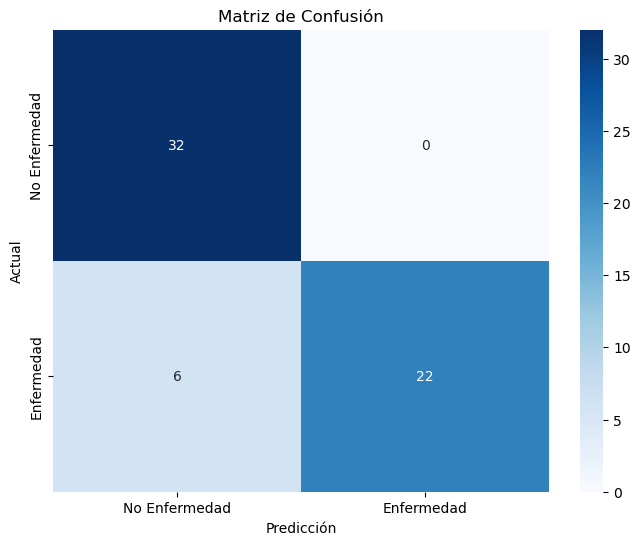

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Enfermedad', 'Enfermedad'], yticklabels=['No Enfermedad', 'Enfermedad'])
plt.ylabel('Actual')
plt.xlabel('Predicción')
plt.title('Matriz de Confusión')
plt.show()


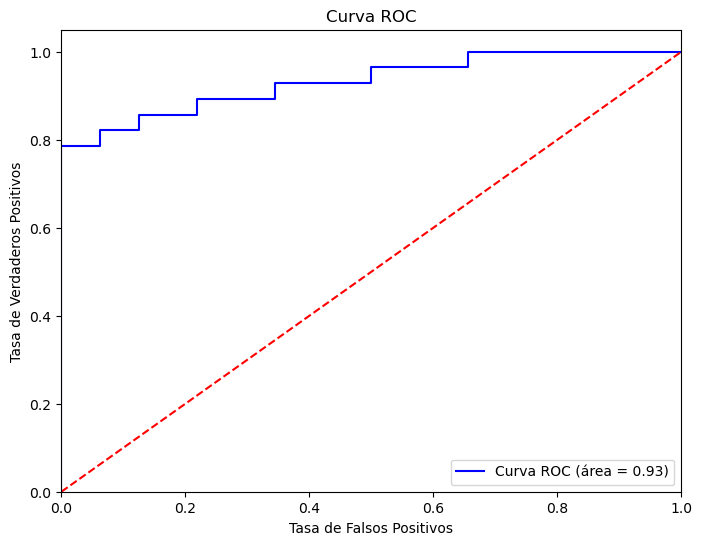

In [83]:
from sklearn.metrics import roc_curve, auc

# Obtener las probabilidades de predicción
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='Curva ROC (área = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
